## Observations and Insights 

1. There is a positive correlation between mouse weight and average tumor volume for the Capomulin treatment
2. Capomulin and Ramicane appear to be the most effective in shrinking tumor size
3. It took until around day 15 for the Capomulin treatment steadily decrease tumor size, becoming the lowest around day 40.

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = os.path.join("Resources/Mouse_metadata.csv")
study_results_path = os.path.join("Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = merged_data["Mouse ID"].nunique()
mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_grouped = merged_data.loc[:,["Mouse ID", "Timepoint"]]
mouse_duplicate = mouse_grouped[mouse_grouped.duplicated(keep='first')]
mouse_duplicate

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = merged_data[mouse_grouped["Mouse ID"] == "g989"]
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean = merged_data.loc[merged_data["Mouse ID"] != "g989"]
merged_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
merged_mice_count = merged_clean["Mouse ID"].nunique()
merged_mice_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_grouped = merged_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drug_summary_stats = pd.DataFrame(data=drug_grouped.count())

drug_summary_stats["Mean Tumor Volume"] = drug_grouped.mean()
drug_summary_stats["Median Tumor Volume"] = drug_grouped.median()
drug_summary_stats["Variance"] = drug_grouped.var()
drug_summary_stats["Standard Deviation"] = drug_grouped.std()
drug_summary_stats["SEM"] = drug_grouped.sem()
del drug_summary_stats["Tumor Volume (mm3)"]
drug_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped = merged_clean.groupby("Drug Regimen")
summary_stats_agg = grouped.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

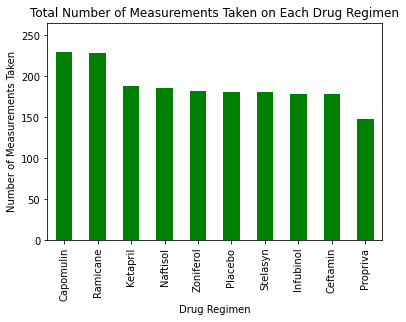

In [9]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_barchart = merged_clean["Drug Regimen"].value_counts().plot(kind="bar", 
                                                                         title="Total Number of Measurements Taken on Each Drug Regimen", 
                                                                         color="green", ylim=(0,265))
measurements_barchart.set_xlabel("Drug Regimen")
measurements_barchart.set_ylabel("Number of Measurements Taken")

measurements_barchart

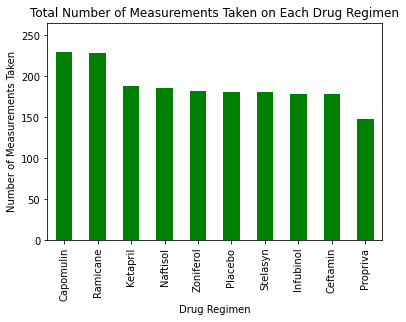

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_count = merged_clean["Drug Regimen"].value_counts()

x_axis = np.arange(len(drug_count))

plt.bar(x_axis, drug_count, color="green", align="center", width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_count.index.values, rotation=90)
plt.xlim(-0.50,len(x_axis)-0.50)
plt.ylim(0, max(drug_count)+35)
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()



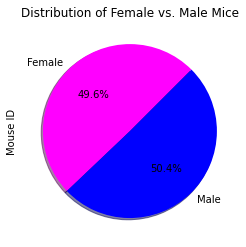

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = merged_clean.groupby("Sex")["Mouse ID"]
gender_count = gender_grouped.nunique()

gender_pie = gender_count.plot(kind="pie", y=None, shadow=True, startangle=45, autopct="%1.1f%%", colors=["magenta", "blue"], title="Distribution of Female vs. Male Mice")

gender_pie


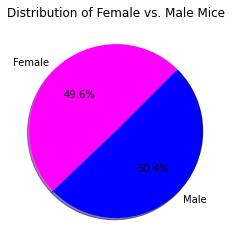

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]

plt.pie(gender_count, labels=gender, shadow=True, startangle=45, autopct="%1.1f%%", colors=["magenta", "blue"])
plt.title("Distribution of Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_time = merged_clean.groupby(["Mouse ID"])['Timepoint'].max()
max_time = max_time.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_time.merge(merged_clean,on=['Mouse ID','Timepoint'],how="left")
mouse_drugs = merged_data.loc[merged_data["Drug Regimen"].isin(treatments)]
mouse_drugs


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data = []

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    tumor_volume = mouse_drugs.loc[mouse_drugs["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_data.append(tumor_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    print(f"IQR for {treatment}: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    
    outliers = (tumor_volume.loc[(mouse_drugs["Tumor Volume (mm3)"] >= upper_bound)|
                                  (mouse_drugs["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"The number of outliers for {treatment}: {outliers}")
    


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
The number of outliers for Capomulin: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
The number of outliers for Ramicane: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
The number of outliers for Infubinol: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
The number of outliers for Ceftamin: 0


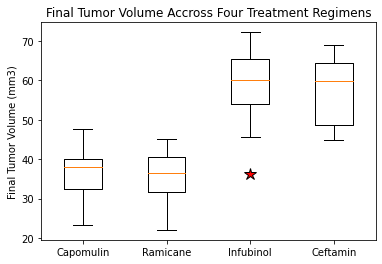

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker="*", markerfacecolor='red', markersize=12  )

plt.boxplot(tumor_data, flierprops=flierprops)
plt.title("Final Tumor Volume Accross Four Treatment Regimens")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

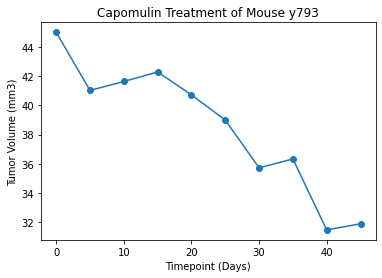

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = merged_clean.loc[merged_clean["Mouse ID"] == "y793"]
plt.plot(capo_mouse["Timepoint"], capo_mouse["Tumor Volume (mm3)"], marker='o')
plt.title("Capomulin Treatment of Mouse y793")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

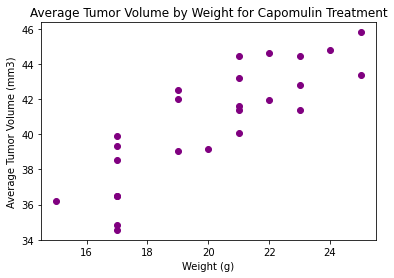

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capo = merged_clean.loc[merged_clean["Drug Regimen"] == "Capomulin"]
avg_tumor = pd.DataFrame(mouse_capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index())
avg_tumor = pd.merge(mouse_capo, avg_tumor, on="Mouse ID")
avg_tumor

final_avg = avg_tumor[["Weight (g)", "Tumor Volume (mm3)_y"]].drop_duplicates()
final_avg

#set x and y axis values
x_axis = final_avg["Weight (g)"]
y_axis = final_avg["Tumor Volume (mm3)_y"]

plt.scatter(x_axis, y_axis, marker='o', facecolors='purple')
plt.title("Average Tumor Volume by Weight for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is: 0.84
0      37.777635
10     35.868756
20     37.777635
30     37.777635
35     37.777635
45     37.777635
55     37.777635
65     39.686515
75     37.777635
85     40.640954
95     41.595394
105    39.686515
115    39.686515
125    41.595394
135    42.549834
145    41.595394
153    43.504273
163    43.504273
166    41.595394
176    42.549834
186    43.504273
196    41.595394
206    45.413153
216    44.458713
226    45.413153
Name: Weight (g), dtype: float64


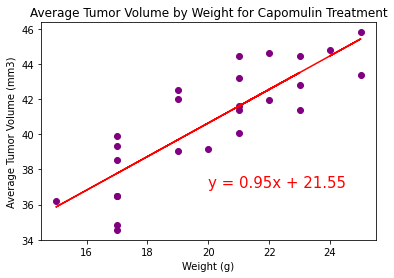

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#copied code from above
mouse_capo = merged_clean.loc[merged_clean["Drug Regimen"] == "Capomulin"]
avg_tumor = pd.DataFrame(mouse_capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index())
avg_tumor = pd.merge(mouse_capo, avg_tumor, on="Mouse ID")
avg_tumor
final_avg = avg_tumor[["Weight (g)", "Tumor Volume (mm3)_y"]].drop_duplicates()
final_avg

x_axis = final_avg["Weight (g)"]
y_axis = final_avg["Tumor Volume (mm3)_y"]

#correlation coefficient calculation
corr_coeff = round(st.pearsonr(x_axis, y_axis)[0], 2)
print(f'The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is: {corr_coeff}')

#linear regression 
avt_slope, avt_int, act_r, avt_p, avt_std_err = st.linregress(x_axis, y_axis)
avt_fit = avt_slope * x_axis + avt_int
print(avt_fit)
line_eq = "y = " + str(round(avt_slope, 2)) + "x + " + str(round(avt_int, 2))


#plot linear regression model on top of scatter plot
plt.scatter(x_axis, y_axis, marker='o', facecolors='purple')
plt.plot(x_axis, avt_fit,"-", color='red')
plt.annotate(line_eq,(20,37), fontsize=15,color='red')
plt.title("Average Tumor Volume by Weight for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
